# INTEG 475 - Introduction to Agent-Based Models 

The following tutorial is based off of Adil Moujahid's [Introduction to Agent-Based Models](https://www.binpress.com/tutorial/introduction-to-agentbased-models-an-implementation-of-schelling-model-in-python/144) 

In [5]:
import matplotlib.pyplot as plt
import itertools
import random
import copy

Each portion of the final class will be presented here as a class of its own; the final class will inherit properties from each of them, creating the finished Schelling class.

In [6]:
class BASE:
    
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races = 2):
        self.width = width 
        self.height = height 
        self.races = races
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.empty_houses = []
        self.agents = {}
        
        ## A number of other class methods to follow
        

In [7]:
class POPULATE:
    
    def populate(self):
        self.all_houses = list(itertools.product(range(self.width),range(self.height)))
        random.shuffle(self.all_houses)

        self.n_empty = int( self.empty_ratio * len(self.all_houses) )
        self.empty_houses = self.all_houses[:self.n_empty]

        self.remaining_houses = self.all_houses[self.n_empty:]
        houses_by_race = [self.remaining_houses[i::self.races] for i in range(self.races)]
        for i in range(self.races):
            #create agents for each race
            self.agents = dict(
                                list(self.agents.items()) + 
                                list(dict(zip(houses_by_race[i], [i+1]*len(houses_by_race[i]))).items())
                            )

In [8]:
 class UNSATISFIED:
        
    def is_unsatisfied(self, x, y):

        race = self.agents[(x,y)]
        count_similar = 0
        count_different = 0

        if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
            if self.agents[(x-1, y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if y > 0 and (x,y-1) not in self.empty_houses:
            if self.agents[(x,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x < (self.width-1) and y > 0 and (x+1,y-1) not in self.empty_houses:
            if self.agents[(x+1,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and (x-1,y) not in self.empty_houses:
            if self.agents[(x-1,y)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and (x+1,y) not in self.empty_houses:
            if self.agents[(x+1,y)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and y < (self.height-1) and (x-1,y+1) not in self.empty_houses:
            if self.agents[(x-1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x > 0 and y < (self.height-1) and (x,y+1) not in self.empty_houses:
            if self.agents[(x,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and y < (self.height-1) and (x+1,y+1) not in self.empty_houses:
            if self.agents[(x+1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1

        if (count_similar+count_different) == 0:
            return False
        else:
            return float(count_similar)/(count_similar+count_different) < self.similarity_threshold


In [9]:
class UPDATE:
    
    def update(self):
        for i in range(self.n_iterations):
            self.old_agents = copy.deepcopy(self.agents)
            n_changes = 0
            for agent in self.old_agents:
                if self.is_unsatisfied(agent[0], agent[1]):
                    agent_race = self.agents[agent]
                    empty_house = random.choice(self.empty_houses)
                    self.agents[empty_house] = agent_race
                    del self.agents[agent]
                    self.empty_houses.remove(empty_house)
                    self.empty_houses.append(agent)
                    n_changes += 1
            if n_changes == 0:
                break

In [10]:
class PLOT:
    
    def plot(self, title):
        fig, ax = plt.subplots(facecolor="black", figsize=(8, 8))
        #If you want to run the simulation with more than 7 colors, you should set agent_colors accordingly
        agent_colors = {1:'b', 2:'r', 3:'g', 4:'c', 5:'m', 6:'y', 7:'k'}
        for agent in self.agents:
            ax.scatter(agent[0]+0.5, agent[1]+0.5, color=agent_colors[self.agents[agent]], marker = 'o')

        ax.set_title(title, fontsize=10, fontweight='bold', color='w')
        ax.set_xlim([0, self.width])
        ax.set_ylim([0, self.height])
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_clip_on(False)
        ax.set_facecolor("lightgrey")
        plt.show()

In [11]:
class CALCULATE:
    
    def calculate_similarity(self):
        similarity = []
        for agent in self.agents:
            count_similar = 0
            count_different = 0
            x = agent[0]
            y = agent[1]
            race = self.agents[(x,y)]
            if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
                if self.agents[(x-1, y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if y > 0 and (x,y-1) not in self.empty_houses:
                if self.agents[(x,y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x < (self.width-1) and y > 0 and (x+1,y-1) not in self.empty_houses:
                if self.agents[(x+1,y-1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x > 0 and (x-1,y) not in self.empty_houses:
                if self.agents[(x-1,y)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x < (self.width-1) and (x+1,y) not in self.empty_houses:
                if self.agents[(x+1,y)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            if x > 0 and y < (self.height-1) and (x-1,y+1) not in self.empty_houses:
                if self.agents[(x-1,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x > 0 and y < (self.height-1) and (x,y+1) not in self.empty_houses:
                if self.agents[(x,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1        
            if x < (self.width-1) and y < (self.height-1) and (x+1,y+1) not in self.empty_houses:
                if self.agents[(x+1,y+1)] == race:
                    count_similar += 1
                else:
                    count_different += 1
            try:
                similarity.append(float(count_similar)/(count_similar+count_different))
            except:
                similarity.append(1)
        return sum(similarity)/len(similarity)

In [12]:
class Schelling(BASE, POPULATE, UNSATISFIED, UPDATE, PLOT, CALCULATE):
    pass

In [21]:
#Control Panel - ignore for now

width                  = 50
height                 = 50   
empty_ratio            = 0.3       
similarity_threshold_1 = 0.3
similarity_threshold_2 = 0.5
similarity_threshold_3 = 0.6
n_iterations           = 500         
races                  = 5           

In [22]:
schelling_initial = Schelling(width, height, empty_ratio, similarity_threshold_1, n_iterations, races)
schelling_initial.populate()

schelling_1 = Schelling(width, height, empty_ratio, similarity_threshold_1, n_iterations, races)
schelling_1.agents = copy.deepcopy(schelling_initial.agents)
schelling_1.empty_houses = copy.deepcopy(schelling_initial.empty_houses)

schelling_2 = Schelling(width, height, empty_ratio, similarity_threshold_2, n_iterations, races)
schelling_2.agents = copy.deepcopy(schelling_initial.agents)
schelling_2.empty_houses = copy.deepcopy(schelling_initial.empty_houses)

schelling_3 = Schelling(width, height, empty_ratio, similarity_threshold_3, n_iterations, races)
schelling_3.agents = copy.deepcopy(schelling_initial.agents)
schelling_3.empty_houses = copy.deepcopy(schelling_initial.empty_houses)





In [23]:
schelling_1.update()
schelling_2.update()
schelling_3.update()

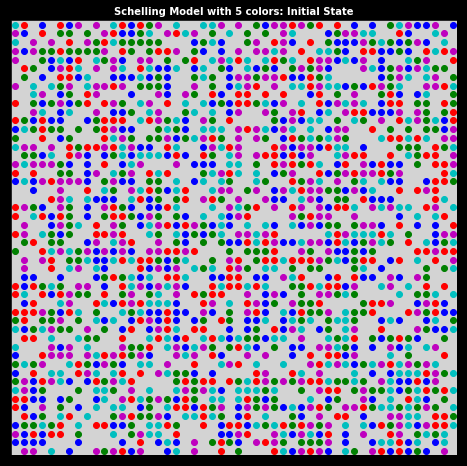

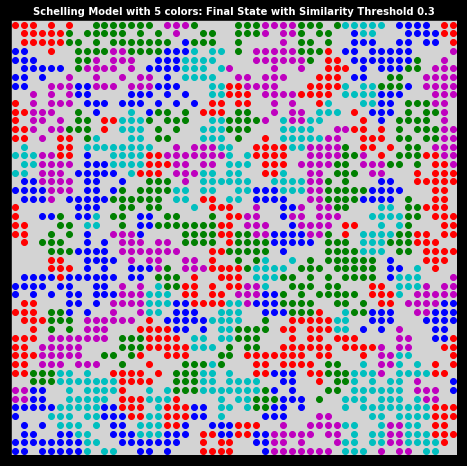

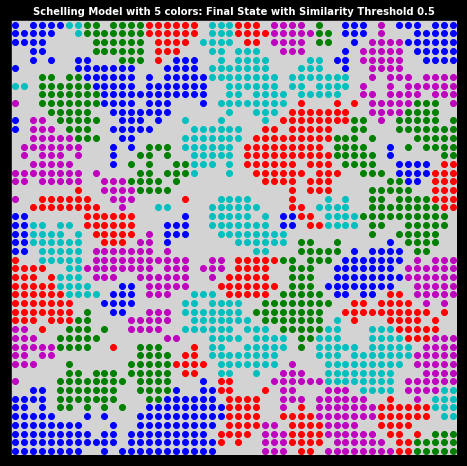

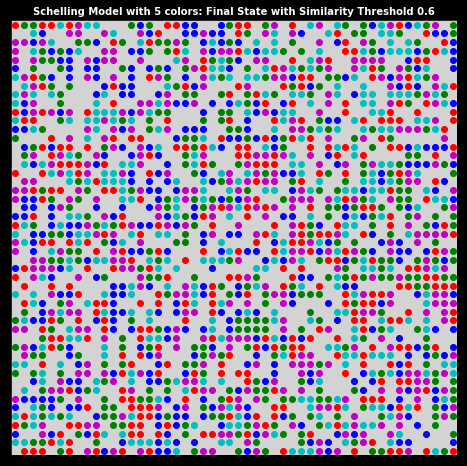

In [24]:
schelling_initial.plot('Schelling Model with ' + str(races) + ' colors: Initial State')
schelling_1.plot('Schelling Model with ' + str(races) + ' colors: Final State with Similarity Threshold ' + str(similarity_threshold_1))
schelling_2.plot('Schelling Model with ' + str(races) + ' colors: Final State with Similarity Threshold ' + str(similarity_threshold_2))
schelling_3.plot('Schelling Model with ' + str(races) + ' colors: Final State with Similarity Threshold ' + str(similarity_threshold_3))